Linear Regression using bootstrap sampling

In [122]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [18]:
# Engine Size (L)
engine_size = [3.87, 4.75, 4.65, 2.97, 3.88, 4.23, 2.52, 3.34, 3.74, 3.56,
               4.61, 3.09, 3.45, 4.89, 4.32, 2.87, 3.99, 3.23, 3.67, 4.11,
               4.76, 3.12, 2.98, 3.88, 4.44, 3.25, 4.56, 4.11, 3.92, 3.67,
               3.15, 2.98, 4.77, 3.31, 4.23, 4.08, 3.74, 3.67, 4.44, 3.89,
               4.25, 3.12, 3.98, 4.55, 2.99, 3.76, 4.17, 4.83, 3.42, 3.88,
               4.23, 4.61, 3.87, 4.76, 3.55, 4.33, 4.45, 3.11, 3.77, 4.55,
               3.22, 4.88, 3.99, 4.67, 3.21, 3.58, 4.34, 4.77, 3.32, 4.15,
               4.66, 3.48, 4.83, 4.22, 3.99, 4.78, 3.15, 3.88, 4.41, 3.67,
               4.73, 3.33, 4.76, 3.91, 4.17, 4.54, 3.84, 3.27, 3.99, 3.76,
               4.67, 4.12, 3.88, 4.53, 3.78, 3.42, 4.29, 4.10, 3.66, 3.87]

# Mileage (mpg)
mileage = [23.36, 29.40, 16.91, 21.87, 32.10, 18.23, 24.56, 26.78, 22.45, 27.89,
           30.67, 19.45, 22.98, 21.33, 20.55, 29.14, 24.77, 23.99, 30.45, 28.12,
           25.67, 20.12, 31.89, 27.78, 21.34, 22.56, 19.67, 30.88, 28.92, 26.77,
           23.11, 19.98, 22.77, 32.31, 24.23, 27.08, 21.74, 29.67, 23.44, 31.89,
           27.25, 28.12, 25.98, 29.55, 22.99, 30.76, 28.17, 24.83, 23.42, 26.88,
           27.23, 31.61, 29.87, 27.76, 25.55, 24.33, 26.45, 20.11, 30.77, 28.55,
           24.22, 22.88, 30.99, 23.67, 26.21, 28.58, 29.34, 22.77, 21.32, 28.15,
           24.66, 23.48, 30.83, 26.22, 27.99, 29.78, 23.15, 28.88, 31.41, 24.67,
           22.73, 25.33, 31.76, 23.91, 29.17, 26.54, 23.84, 21.27, 25.99, 27.76,
           29.67, 24.12, 26.88, 30.53, 22.78, 23.42, 27.29, 29.10, 24.66, 20.28]

# Price ($)
price = [27674, 27173, 31639, 28576, 29231, 31022, 27150, 28456, 27876, 29567,
         32211, 28122, 29034, 32456, 31789, 26667, 28812, 27777, 29845, 30999,
         33123, 28212, 27678, 29345, 31766, 27556, 31834, 30321, 29788, 28345,
         27512, 27998, 31467, 28031, 30788, 31245, 29876, 29367, 31844, 28789,
         30525, 27612, 29798, 32255, 27099, 29876, 31117, 32383, 28442, 29788,
         30723, 32661, 29287, 31776, 28555, 31933, 32845, 27611, 29777, 31555,
         28222, 32988, 29399, 31467, 27621, 28858, 31734, 32977, 28032, 31915,
         32866, 28348, 32783, 31922, 29799, 31878, 27115, 28788, 32641, 28567,
         31773, 28933, 32776, 29191, 31917, 32554, 29884, 27727, 29099, 29876,
         31467, 28912, 29788, 32853, 28678, 28442, 32229, 31010, 28966, 29579]


In [19]:
df=pd.DataFrame({"engine_size":engine_size,"mileage":mileage,"price":price})

In [20]:
x=df.drop(columns=['price'],axis=0)

In [21]:
y=df['price']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [23]:
type(x_train)

pandas.core.frame.DataFrame

In [79]:
class LinearStrapRegressor():
    def __init__(self,size):
       self.size=size
       self.samples=[]
       
    def train_data(self,x:pd.DataFrame,y:pd.DataFrame):
        self.feature=x.shape[1]
        for i in range(self.size):
            xsample=x.sample(n=len(x),replace=True,random_state=i)
            ysample=y.sample(n=len(y),replace=True,random_state=i)
            xbias=np.c_[np.ones([xsample.shape[0],1]),xsample]
            self.samples.append(np.linalg.pinv(xbias.T@xbias)@xbias.T@ysample)
        print("model trained")
            
    def predict(self,test:pd.DataFrame):
        prediction=[]
        testbias=np.c_[np.ones((test.shape[0],1)),test]
        for tree in self.samples:
            prediction.append(testbias@tree)
        return np.mean(prediction,axis=0)
        

In [80]:
print(x_train.sample(n=len(x_train),replace=True,random_state=1))

    engine_size  mileage
68         3.32    21.32
7          3.34    26.78
16         3.99    24.77
5          4.23    18.23
20         4.76    25.67
..          ...      ...
86         3.84    23.84
75         4.78    29.78
54         3.55    25.55
38         4.44    23.44
52         3.87    29.87

[70 rows x 2 columns]


In [73]:
print(y_train.sample(n=len(y_train),replace=True,random_state=1))

68    28032
7     28456
16    28812
5     31022
20    33123
      ...  
86    29884
75    31878
54    28555
38    31844
52    29287
Name: price, Length: 70, dtype: int64


In [115]:
model1=LinearStrapRegressor(30)


In [116]:
model1.train_data(x_train,y_train)

model trained


In [117]:
model1.samples

[array([1.87677131e+04, 2.81178147e+03, 7.62881062e+00]),
 array([18112.97428146,  2769.6953146 ,    41.1653855 ]),
 array([17863.96496771,  2789.92912272,    46.08176997]),
 array([ 2.06638157e+04,  2.39325101e+03, -5.29228171e+00]),
 array([20348.68752019,  2584.07371617,   -27.60408299]),
 array([1.80815569e+04, 2.96291073e+03, 1.18963350e+01]),
 array([18112.80174164,  2677.85643794,    59.20551185]),
 array([1.81279203e+04, 2.92935986e+03, 1.67750445e+01]),
 array([ 1.93408386e+04,  2.66411901e+03, -8.51411978e-01]),
 array([2.00081370e+04, 2.45844737e+03, 6.32358292e+00]),
 array([ 2.10172887e+04,  2.32143605e+03, -8.99784530e+00]),
 array([15968.59005463,  3163.50362428,    58.56360142]),
 array([19312.04734675,  2866.45395079,   -26.31103664]),
 array([1.96449405e+04, 2.52671713e+03, 1.25529323e+01]),
 array([1.86350092e+04, 2.77879164e+03, 1.85738603e+01]),
 array([1.93105055e+04, 2.68717872e+03, 3.83103393e+00]),
 array([20054.68806222,  2629.30174304,   -20.26740395]),
 arra

In [118]:
predictions=model1.predict(x_test)

In [121]:
pd.DataFrame({"predictions":predictions.flatten(),"actuals":y_test.reset_index(drop=True)}).sort_values(by="actuals").reset_index(drop=True)

,predictions,actuals
0,27123.612847,26667
1,27327.339707,27099
2,27769.677263,27115
3,27768.860509,27512
4,29749.782644,27674
5,27481.625730,27678
6,27238.437003,27998
7,28395.784638,28031
8,29889.936708,28788
9,29978.839411,28789


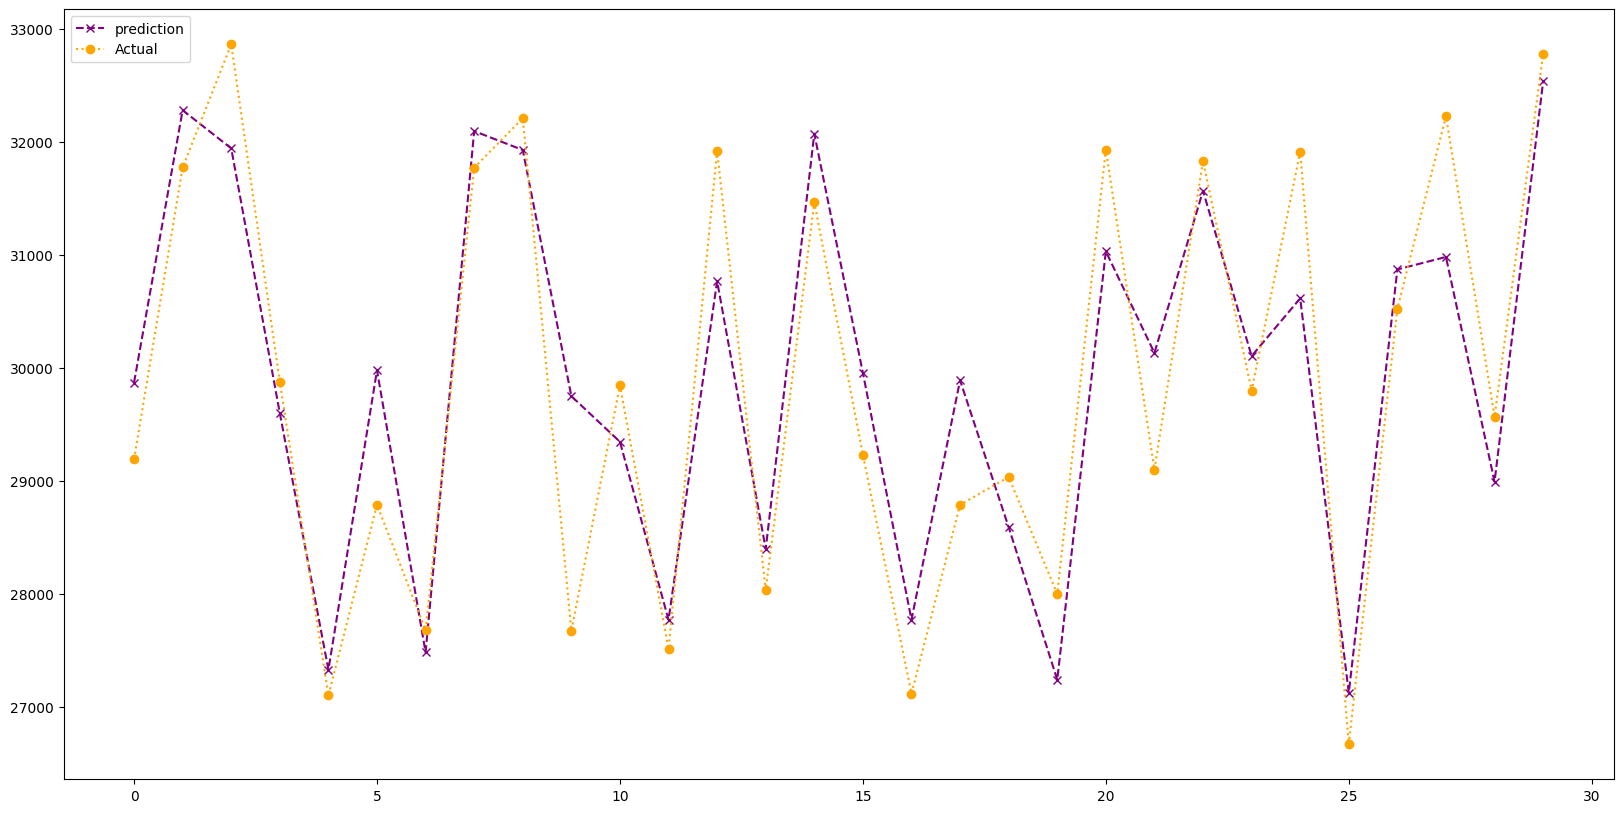

In [120]:
plt.figure(figsize=(20,10))
plt.plot(predictions.flatten(),linestyle='--',color='purple',marker='x',label='prediction')
plt.plot(y_test.reset_index(drop=True),linestyle="dotted",color='orange',marker='o',label='Actual')
plt.legend()
plt.show()

In [123]:
model2=LinearRegression()
model2.fit(x_train,y_train)
y_preds=model2.predict(x_test)

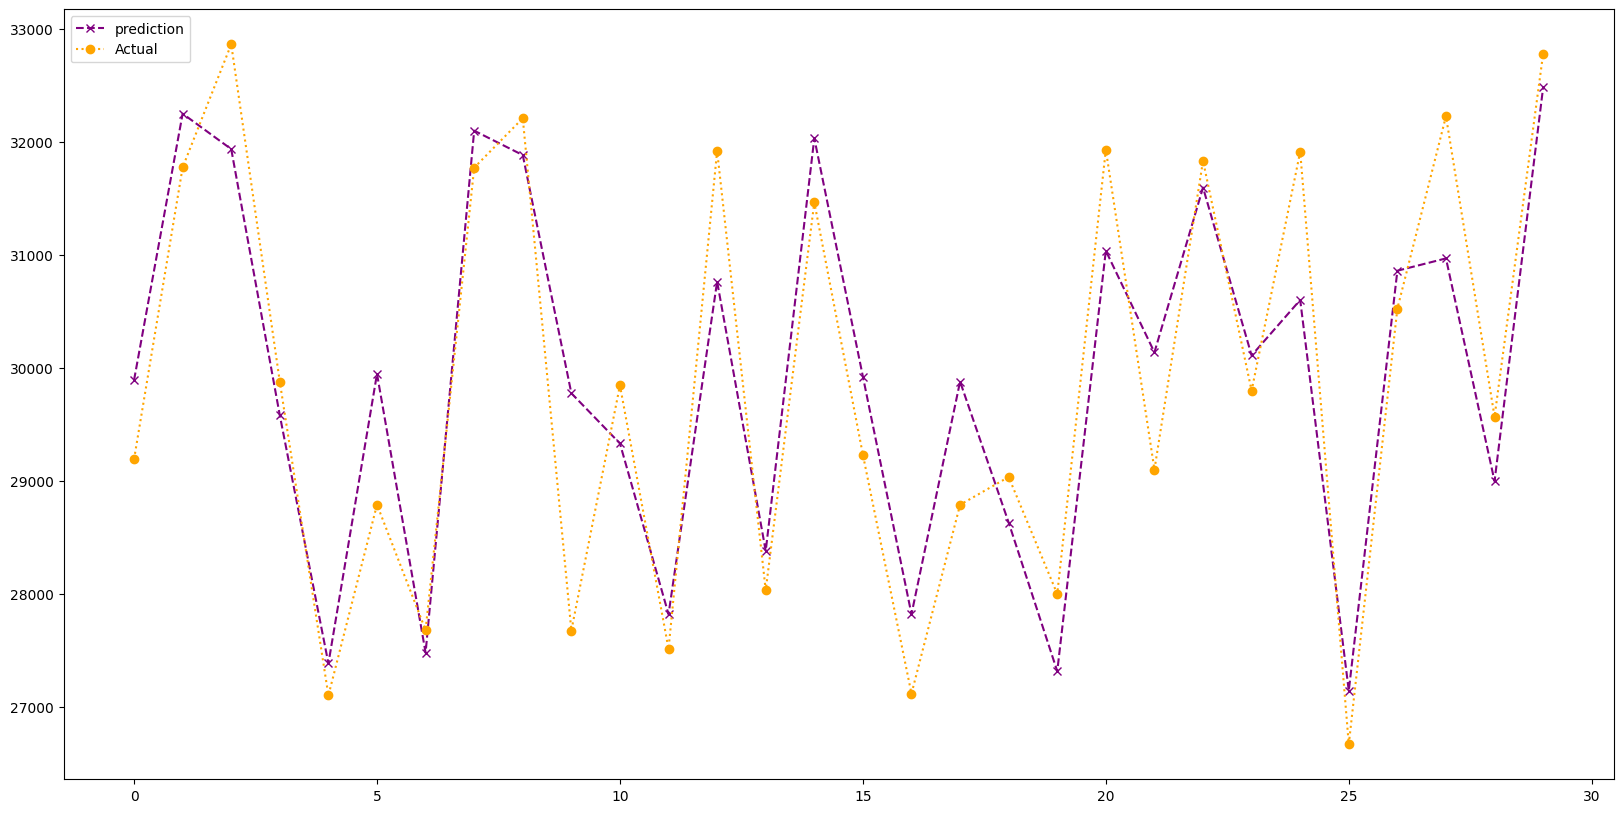

In [124]:
plt.figure(figsize=(20,10))
plt.plot(y_preds.flatten(),linestyle='--',color='purple',marker='x',label='prediction')
plt.plot(y_test.reset_index(drop=True),linestyle="dotted",color='orange',marker='o',label='Actual')
plt.legend()
plt.show()

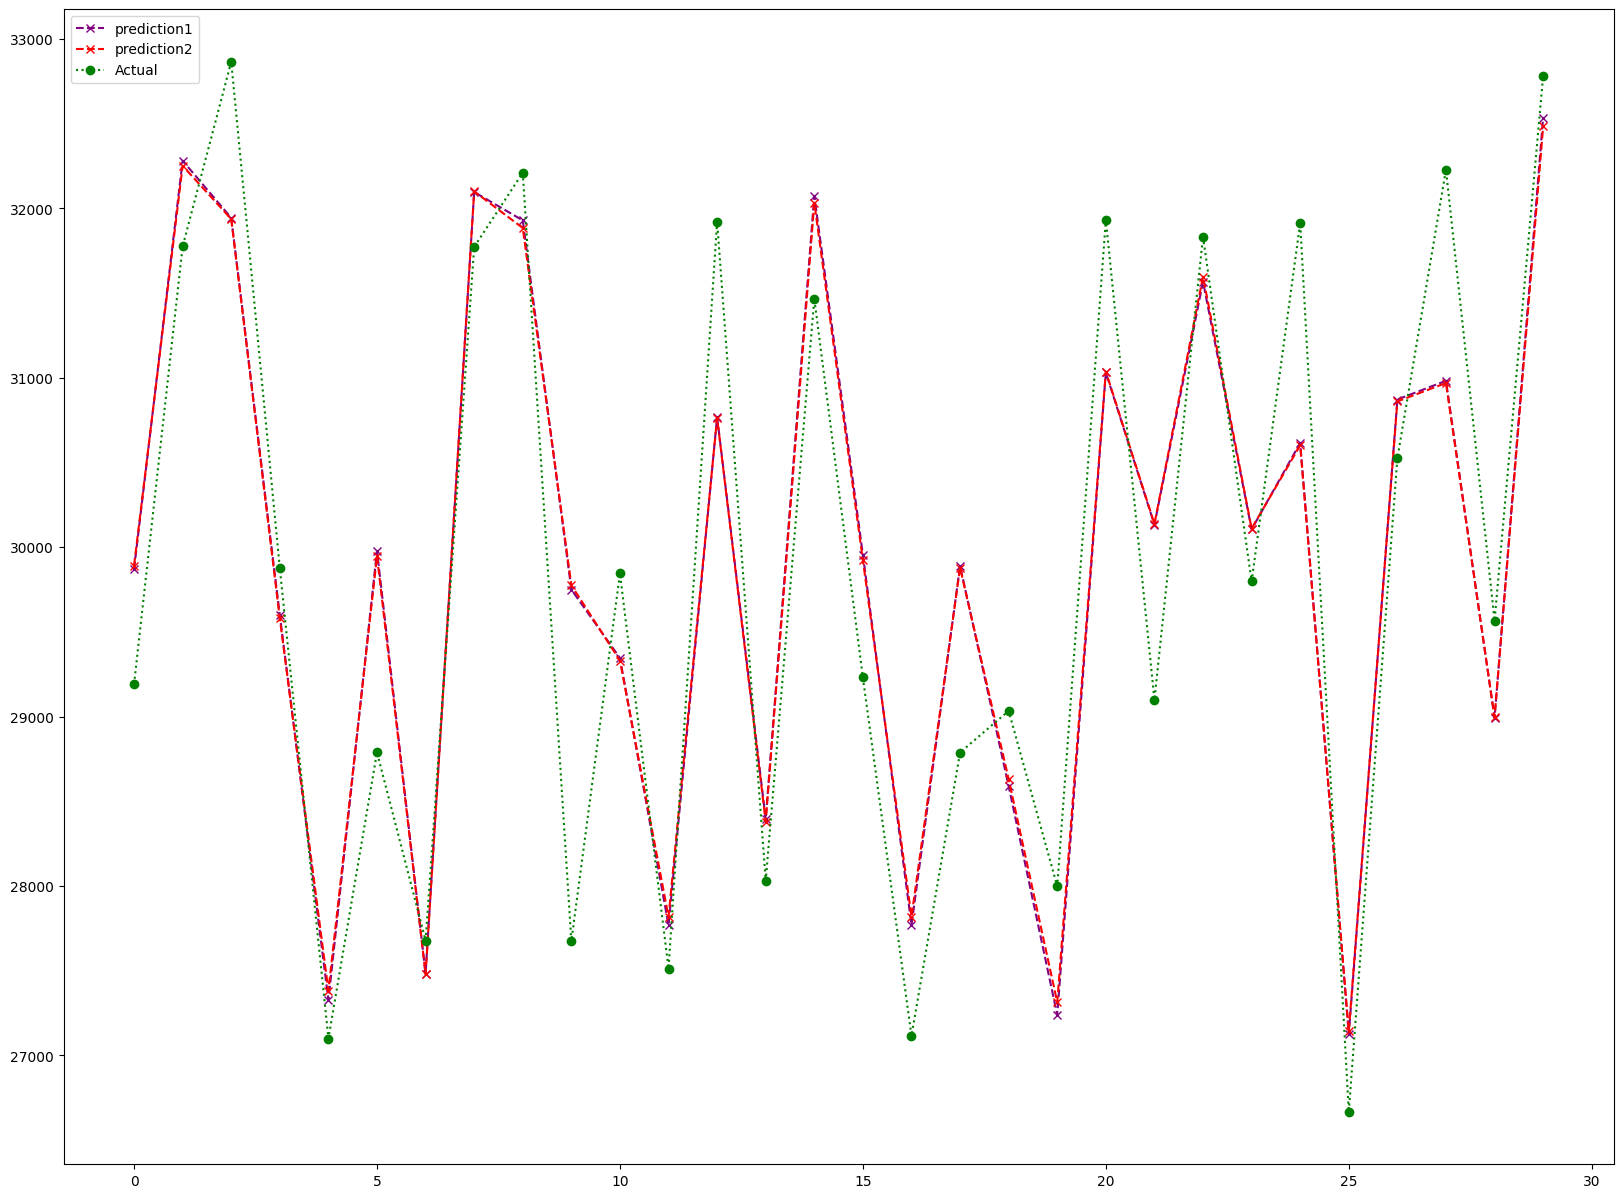

In [133]:
plt.figure(figsize=(20,15))
plt.plot(predictions.flatten(),linestyle='--',color='purple',marker='x',label='prediction1')
plt.plot(y_preds.flatten(),linestyle='--',color='red',marker='x',label='prediction2')
plt.plot(y_test.reset_index(drop=True),linestyle="dotted",color='green',marker='o',label='Actual')
plt.legend()
plt.show()

In [134]:
print("RMSE model1:",root_mean_squared_error(predictions,y_test))
print("RMSE model2:",root_mean_squared_error(y_preds,y_test))


RMSE model1: 790.3761999513545
RMSE model2: 791.5031566426387


In [136]:
print(model2.score(x_test,y_test))

0.8250828253432065


so, ah using bootstrap sampling has a slight better results